<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,0.003531,241.701587,241.699095,0.002492
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-0.009793,262.346662,262.354311,-0.007650
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.000626,236.289058,236.287517,0.001541
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,0.004172,236.149847,236.145542,0.004306
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,0.008645,204.865034,204.857203,0.007831
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-0.013600,174.602183,174.620240,-0.018057
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.000507,241.113260,241.112220,0.001040
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.000999,257.382892,257.384190,-0.001298
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,0.004808,174.245449,174.243979,0.001470


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,0.003531,241.701587,241.699095,0.002492
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-0.009793,262.346662,262.354311,-0.007650
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.000626,236.289058,236.287517,0.001541
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,0.004172,236.149847,236.145542,0.004306
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,0.008645,204.865034,204.857203,0.007831
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-0.013600,174.602183,174.620240,-0.018057
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.000507,241.113260,241.112220,0.001040
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.000999,257.382892,257.384190,-0.001298
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,0.004808,174.245449,174.243979,0.001470


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.397732  68.596157  89.282447  30.421720  0.003531  241.701587   
      1.0    83.294725  35.671147  43.165323  90.225260 -0.009793  262.346662   
      2.0    65.939362  34.549509  42.750636  83.048925  0.000626  236.289058   
      3.0    72.296970  33.827723  97.953638  22.067344  0.004172  236.149847   
      4.0    55.555330  21.652133  87.101326  30.547599  0.008645  204.865034   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -0.013600  174.602183   
      56.0   41.026724  93.513932  74.700442  21.871653  0.000507  241.113260   
      57.0   90.935659  33.549845  25.946182  96.950207  0.000999  257.382892   
      58.0   23.123742  48.312525  61.714003  31.090371  0.004808  174.245449   
      59.0   56.635370  66.915720  52.673233  72.200259  0.002632  258.427214   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.699095  0.002492  
      1.0    262.354311 -0.007650  
      2.0    236.287517  0.001541  
      3.0    236.145542  0.004306  
      4.0    204.857203  0.007831  
...                 ...       ...  
999.0 55.0   174.620240 -0.018057  
      56.0   241.112220  0.001040  
      57.0   257.384190 -0.001298  
      58.0   174.243979  0.001470  
      59.0   258.425204  0.002010  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.397732  68.596157  89.282447  30.421720  0.003531  241.701587   
      1.0    83.294725  35.671147  43.165323  90.225260 -0.009793  262.346662   
      2.0    65.939362  34.549509  42.750636  83.048925  0.000626  236.289058   
      3.0    72.296970  33.827723  97.953638  22.067344  0.004172  236.149847   
      4.0    55.555330  21.652133  87.101326  30.547599  0.008645  204.865034   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -0.013600  174.602183   
      56.0   41.026724  93.513932  74.700442  21.871653  0.000507  241.113260   
      57.0   90.935659  33.549845  25.946182  96.950207  0.000999  257.382892   
      58.0   23.123742  48.312525  61.714003  31.090371  0.004808  174.245449   
      59.0   56.635370  66.915720  52.673233  72.200259  0.002632  258.427214   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.699095  0.002492  
      1.0    262.354311 -0.007650  
      2.0    236.287517  0.001541  
      3.0    236.145542  0.004306  
      4.0    204.857203  0.007831  
...                 ...       ...  
999.0 55.0   174.620240 -0.018057  
      56.0   241.112220  0.001040  
      57.0   257.384190 -0.001298  
      58.0   174.243979  0.001470  
      59.0   258.425204  0.002010  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,0.003531,241.701587,241.699095,0.002492
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-0.009793,262.346662,262.354311,-0.007650
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.000626,236.289058,236.287517,0.001541
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,0.004172,236.149847,236.145542,0.004306
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,0.008645,204.865034,204.857203,0.007831
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-0.013600,174.602183,174.620240,-0.018057
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.000507,241.113260,241.112220,0.001040
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.000999,257.382892,257.384190,-0.001298
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,0.004808,174.245449,174.243979,0.001470


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.397732  68.596157  89.282447  30.421720  0.003531  241.701587   
      1.0    83.294725  35.671147  43.165323  90.225260 -0.009793  262.346662   
      2.0    65.939362  34.549509  42.750636  83.048925  0.000626  236.289058   
      3.0    72.296970  33.827723  97.953638  22.067344  0.004172  236.149847   
      4.0    55.555330  21.652133  87.101326  30.547599  0.008645  204.865034   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -0.013600  174.602183   
      56.0   41.026724  93.513932  74.700442  21.871653  0.000507  241.113260   
      57.0   90.935659  33.549845  25.946182  96.950207  0.000999  257.382892   
      58.0   23.123742  48.312525  61.714003  31.090371  0.004808  174.245449   
      59.0   56.635370  66.915720  52.673233  72.200259  0.002632  258.427214   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.699095  0.002492  
      1.0    262.354311 -0.007650  
      2.0    236.287517  0.001541  
      3.0    236.145542  0.004306  
      4.0    204.857203  0.007831  
...                 ...       ...  
999.0 55.0   174.620240 -0.018057  
      56.0   241.112220  0.001040  
      57.0   257.384190 -0.001298  
      58.0   174.243979  0.001470  
      59.0   258.425204  0.002010  

[60000 rows x 8 columns]

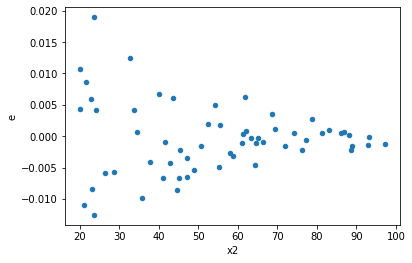

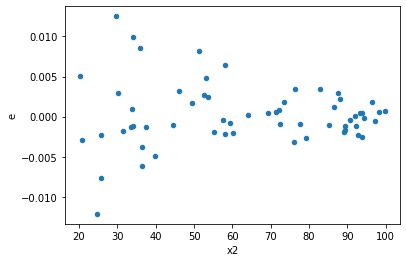

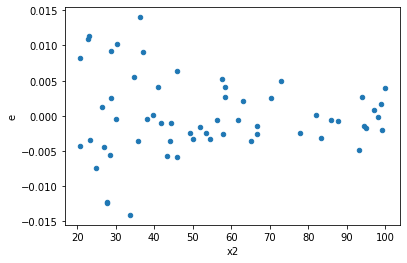

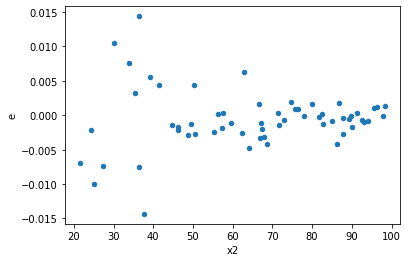

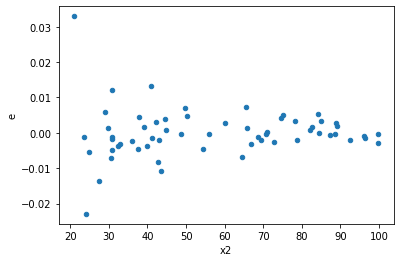

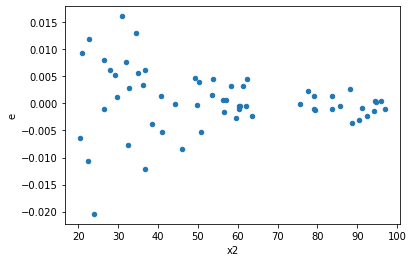

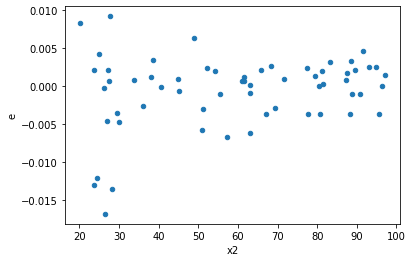

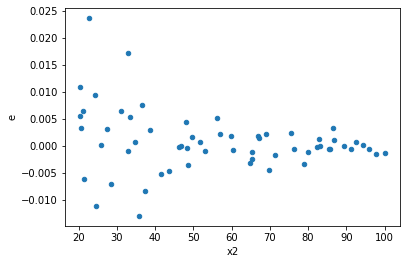

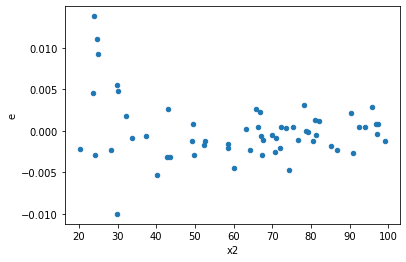

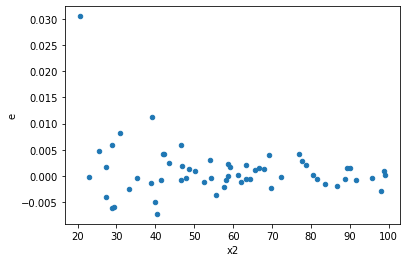

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,20.0,20.0,0.0005473462199986337,0.0005945869268729102,2.7367310999931683e-05,2.9729346343645508e-05,1.0863086382041598,0.8549632621499366,0.5725183689250317,0.4274816310749683,Reject001=1 : Homoscedasticity
33.0,20.0,20.0,0.00042448768607628024,0.0016764558802350251,2.122438430381401e-05,8.382279401175126e-05,3.9493628089220163,0.003427170172355831,0.9982864149138221,0.0017135850861779156,Reject001=0 : Heteroscedasticity
47.0,20.0,20.0,0.00038814198220610133,0.00047521478942457677,1.9407099110305065e-05,2.3760739471228838e-05,1.224332360863351,0.655181791664927,0.6724091041675365,0.3275908958324635,Reject001=1 : Homoscedasticity
50.0,20.0,20.0,0.0001330587788331156,0.00018170977041527309,6.65293894165578e-06,9.085488520763654e-06,1.3656353380724795,0.49221895971278995,0.753890520143605,0.24610947985639497,Reject001=1 : Homoscedasticity
52.0,20.0,20.0,0.0005510240977212177,0.0007406402076649286,2.7551204886060887e-05,3.7032010383246435e-05,1.3441158213005129,0.5144614959520293,0.7427692520239854,0.25723074797601464,Reject001=1 : Homoscedasticity
82.0,20.0,20.0,0.00018283493338380036,0.0002920223790263025,9.141746669190018e-06,1.4601118951315125e-05,1.5971913770619528,0.30328040682583657,0.8483597965870817,0.15164020341291828,Reject001=1 : Homoscedasticity
84.0,20.0,20.0,0.00018500403654203422,0.00040407986195493744,9.25020182710171e-06,2.0203993097746873e-05,2.184167813349995,0.08833254255700185,0.9558337287214991,0.044166271278500924,Reject001=1 : Homoscedasticity
132.0,20.0,20.0,0.00027338664730401803,0.0002906474780867085,1.3669332365200902e-05,1.4532373904335425e-05,1.0631370659573423,0.892461044857662,0.553769477571169,0.446230522428831,Reject001=1 : Homoscedasticity
145.0,20.0,20.0,0.000184075214309176,0.00026280196906984553,9.2037607154588e-06,1.3140098453492276e-05,1.4276879701383298,0.4328966787668913,0.7835516606165543,0.21644833938344565,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.0010051622736496606,0.00015707943820931927,5.025811368248303e-05,7.853971910465964e-06,0.15627271568696754,0.00011617040845329076,Reject001=0 : Heteroscedasticity
1.0,20.0,20.0,0.00033374591658725855,0.00018411493642802153,1.6687295829362927e-05,9.205746821401076e-06,0.5516619897876243,0.19217591688480085,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,0.0005473462199986337,0.0005945869268729102,2.7367310999931683e-05,2.9729346343645508e-05,1.0863086382041598,0.8549632621499366,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,0.0004735468782214973,0.00023070365810930034,2.3677343911074864e-05,1.1535182905465017e-05,0.48718230173062355,0.11604064136106065,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,0.0006719809570369112,0.0006002820193611019,3.359904785184556e-05,3.001410096805509e-05,0.8933021286913179,0.8032845696280685,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,0.000738964380876734,0.0006047969383949997,3.69482190438367e-05,3.0239846919749988e-05,0.8184385527181255,0.6584281924431262,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,0.0004633457089879694,0.00022073020005471036,2.316728544939847e-05,1.1036510002735517e-05,0.4763833910037171,0.10532684619039301,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,0.0008920181477681448,0.00018061381586018192,4.460090738840724e-05,9.030690793009095e-06,0.20247773692954893,0.0007668427849707603,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,0.0003139760526452684,5.8758754175856134e-05,1.569880263226342e-05,2.9379377087928066e-06,0.18714406299719313,0.0004391137915480806,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    522
Reject001=1 : Homoscedasticity      478
Name: Result_test, dtype: int64